In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import random as rnd
from sklearn import model_selection

%matplotlib inline

In [4]:
data=pd.read_csv('store.csv')
data.head()

Duration           Start date             End date  Start station number  \
0      1012  2010-09-20 11:27:04  2010-09-20 11:43:56                 31208   
1        61  2010-09-20 11:41:22  2010-09-20 11:42:23                 31209   
2      2690  2010-09-20 12:05:37  2010-09-20 12:50:27                 31600   
3      1406  2010-09-20 12:06:05  2010-09-20 12:29:32                 31600   
4      1413  2010-09-20 12:10:43  2010-09-20 12:34:17                 31100   

                   Start station  End station number  \
0       M St & New Jersey Ave SE               31108   
1                 1st & N St  SE               31209   
2                  5th & K St NW               31100   
3                  5th & K St NW               31602   
4  19th St & Pennsylvania Ave NW               31201   

                     End station Bike number Member type  
0                  4th & M St SW      W00742      Member  
1                 1st & N St  SE      W00032      Member  
2  19th St & Pennsylvania Ave NW      W00993      Member  
3        Park Rd & Holmead Pl NW      W00344      Member  
4                 15th & P St NW      W00883      Member

In [5]:
print(data.columns)

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type'],
      dtype='object')


In [6]:
print(data.info)

<bound method DataFrame.info of         Duration           Start date             End date  \
0           1012  2010-09-20 11:27:04  2010-09-20 11:43:56   
1             61  2010-09-20 11:41:22  2010-09-20 11:42:23   
2           2690  2010-09-20 12:05:37  2010-09-20 12:50:27   
3           1406  2010-09-20 12:06:05  2010-09-20 12:29:32   
4           1413  2010-09-20 12:10:43  2010-09-20 12:34:17   
...          ...                  ...                  ...   
115592      2179  2010-12-31 23:20:32  2010-12-31 23:56:52   
115593       953  2010-12-31 23:21:57  2010-12-31 23:37:50   
115594       737  2010-12-31 23:27:28  2010-12-31 23:39:45   
115595       514  2010-12-31 23:37:38  2010-12-31 23:46:12   
115596     51962  2010-12-31 23:49:05  2011-01-01 14:15:08   

        Start station number                  Start station  \
0                      31208       M St & New Jersey Ave SE   
1                      31209                 1st & N St  SE   
2                      31600      

In [9]:
data.isnull().any()
data=data.fillna(method='ffill')
data.isnull().any()

Duration                False
Start date              False
End date                False
Start station number    False
Start station           False
End station number      False
End station             False
Bike number             False
Member type             False
dtype: bool

In [10]:
data.shape

(115597, 9)

In [11]:
data.head()

Duration           Start date             End date  Start station number  \
0      1012  2010-09-20 11:27:04  2010-09-20 11:43:56                 31208   
1        61  2010-09-20 11:41:22  2010-09-20 11:42:23                 31209   
2      2690  2010-09-20 12:05:37  2010-09-20 12:50:27                 31600   
3      1406  2010-09-20 12:06:05  2010-09-20 12:29:32                 31600   
4      1413  2010-09-20 12:10:43  2010-09-20 12:34:17                 31100   

                   Start station  End station number  \
0       M St & New Jersey Ave SE               31108   
1                 1st & N St  SE               31209   
2                  5th & K St NW               31100   
3                  5th & K St NW               31602   
4  19th St & Pennsylvania Ave NW               31201   

                     End station Bike number Member type  
0                  4th & M St SW      W00742      Member  
1                 1st & N St  SE      W00032      Member  
2  19th St & Pennsylvania Ave NW      W00993      Member  
3        Park Rd & Holmead Pl NW      W00344      Member  
4                 15th & P St NW      W00883      Member

In [12]:
data=data.drop('Start date',axis=1)
data=data.drop('End date',axis=1)
data=data.drop('Start station',axis=1)
data=data.drop('End station',axis=1)

In [13]:
data.head()

Duration  Start station number  End station number Bike number Member type
0      1012                 31208               31108      W00742      Member
1        61                 31209               31209      W00032      Member
2      2690                 31600               31100      W00993      Member
3      1406                 31600               31602      W00344      Member
4      1413                 31100               31201      W00883      Member

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data['Bike number'])
data['Bike number']=le.transform(data['Bike number'])
data.head()

Duration  Start station number  End station number  Bike number Member type
0      1012                 31208               31108          614      Member
1        61                 31209               31209           41      Member
2      2690                 31600               31100          836      Member
3      1406                 31600               31602          282      Member
4      1413                 31100               31201          734      Member

In [26]:
le=LabelEncoder()
le.fit(data['Member type'])
data['Member type']=le.transform(data['Member type'])
data.head()

Duration  Start station number  End station number  Bike number  \
0      1012                 31208               31108          614   
1        61                 31209               31209           41   
2      2690                 31600               31100          836   
3      1406                 31600               31602          282   
4      1413                 31100               31201          734   

   Member type  
0            1  
1            1  
2            1  
3            1  
4            1

In [28]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values
print(X)
print(Y)

[[ 1012 31208 31108   614]
 [   61 31209 31209    41]
 [ 2690 31600 31100   836]
 ...
 [  737 31602 31401   819]
 [  514 31111 31202   946]
 [51962 31111 31111   636]]
[1 1 1 ... 1 1 0]


In [29]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X=sc_x.fit_transform(X)
print(X)

[[-0.08326168 -0.31023298 -0.85954795  0.44990027]
 [-0.409583   -0.30490375 -0.31710155 -1.63560703]
 [ 0.49251875  1.77882666 -0.902514    1.25789787]
 ...
 [-0.17762379  1.78948512  0.7140837   1.19602418]
 [-0.25414288 -0.82716866 -0.35469684  1.65825703]
 [17.39946341 -0.82716866 -0.84343568  0.52997211]]


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [31]:
pd.DataFrame(x_train).head()

0         1         2         3
0  0.522715 -1.408055  1.890279 -1.366274
1 -0.316593 -1.413384 -1.369770 -1.479103
2 -0.146742 -0.283587 -0.897143  1.079556
3  0.066345  0.180057 -0.365438  0.391666
4 -0.079144 -0.203648  1.831201  0.584567

In [32]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
predicted=classifier.predict(x_test)

In [34]:
predicted[0]

1

In [35]:
predicted[1]

1

In [37]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted)
print(cm)

[[ 1497  4592]
 [  131 22680]]


In [39]:
accuracy=(cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0])
print(accuracy)

0.8365743944636678


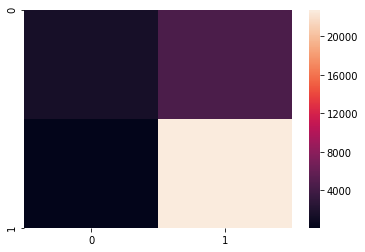

In [40]:
sb.heatmap(cm)